In [1]:
# Import necessary packages
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
import plotly as py
import plotly.graph_objs as go
from IPython.display import Image


# Read in json files and create dataframes for a week in March
# Paid  JSON data for March 13 (0313), 
filename = '2017-03-1319:19:35.293296.ApplePaid.json'
data1 = pd.read_json(filename)
filename2 = '2017-03-1412:41:10.250921.ApplePaid.json'
data2 = pd.read_json(filename2)
filename3 = '2017-03-1508:12:28.725234.ApplePaid.json'
data3 = pd.read_json(filename3)
filename4 = '2017-03-1611:16:17.340204.ApplePaid.json'
data4 = pd.read_json(filename4)
filename5 = '2017-03-2015:55:33.363916.ApplePaid.json'
data5 = pd.read_json(filename5)
filename6 = '2017-03-2015:55:58.908747.ApplePaid.json'
data6 = pd.read_json(filename6)
filename7 = '2017-03-2112:34:50.509028.ApplePaid.json'
data7 = pd.read_json(filename7)

In [2]:
# Combining all of the data sets into one 
data = pd.concat([data1, data2,data3,data4,data5,data6,data7])
# this will be used later on
editedData = pd.concat([data1, data2,data3,data4,data5])
data

,Age Restriction,Category,Compatibility,Description,In App Purchases,Name,Number of Reviews (All Time),Number of Reviews (Current Versions),Overall Rating,Price,Rank,Rating of Current Version,Release,Seller,Size,Version
0,Rated 9+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...",Our latest update includes the new Strangers s...,Yes,Minecraft: Pocket Edition,513472,1051,4.5,$6.99,1,4.5,"Mar 09, 2017",Mojang AB,149 MB,1.0.4
1,Rated 9+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...",Dive in the multi-million selling prison escap...,Yes,The Escapists,Information Not Available,598,Information Not Available,$3.99,2,4.5,"Mar 02, 2017","Team17 Software, Limited",310 MB,1.0
2,Rated 12+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...","It's the game The New York Times called a ""Sen...",Yes,Heads Up!,9275,48,4.5,$0.99,3,4.5,"Mar 02, 2017",Warner Bros. Entertainment,90.5 MB,3.8.6
3,Rated 9+,Games,"iOS 6.0 or later. Compatible with iPhone, iPad...",Five-star tower defense with unrivaled depth a...,Yes,Bloons TD 5,41792,63,4.5,$2.99,4,4.5,"Feb 24, 2017",Kaiparasoft Ltd,113 MB,3.7
4,Rated 4+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...",Jump and fly your way through danger in this r...,Yes,Geometry Dash,264186,3495,5,$1.99,5,4.5,"Jan 18, 2017",RobTop Games AB,83.9 MB,2.10
5,Rated 4+,Photo & Video,"iOS 8.1 or later. Compatible with iPhone, iPad...",“The best all-in-one photo editor provides pow...,Yes,Enlight,4656,56,4.5,$3.99,6,4.5,"Feb 27, 2017",Lightricks Ltd.,128 MB,1.3.3
6,Rated 12+,Games,"iOS 6.0 or later. Compatible with iPhone, iPad...",Can you infect the world? Plague Inc. is a uni...,Yes,Plague Inc.,142656,441,4.5,$0.99,7,4.5,"Jan 25, 2017",Ndemic Creations LTD,95.4 MB,1.13.3
7,Rated 4+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...",Keep moving，Jump！（休むな！８分音符ちゃん）is a small game...,Yes,Yasuhati HD,Information Not Available,14,Information Not Available,$0.99,8,5.0,"Mar 03, 2017",Min Chen,71.7 MB,1.0
8,Rated 4+,Games,"iOS 6.0 or later. Compatible with iPhone, iPad...",••• 75% off for a limited time! •••*** Apple's...,Yes,Prune,638,63,4,$0.99,9,4.0,"Oct 28, 2016",Joel McDonald,106 MB,1.0.68
9,Rated 12+,Games,"iOS 8.0 or later. Compatible with iPhone, iPad...",This is the official mobile port of Five Night...,Yes,Five Nights at Freddy's: Sister Location,Information Not Available,1594,Information Not Available,$2.99,10,4.5,"Jan 03, 2017",Scott Cawthon,104 MB,1.0


In [88]:
# Cleaning the data
# Cleaning the 'Description' column
data['Description'].replace({'\u00a0': '', 
                          '\u2022' : '',
                          '\u2013' : '',
                          '\u00ae' : '',
                          '\u2019' : '',
                          '\u2122' : '',
                          '\u2014' : '',
                          '\u00b7' : '',
                          '\u2013' : ''
                         }, inplace=True)

data['Price'].replace({'$0.99': '99', 
                          '$1.99' : '2',
                          '$14.99' : '15',
                          '$2.99' : '3',
                          '$3.99' : '4',
                          '$4.99' : '5',
                          '$5.99' : '6',
                          '$6.99' : '7',
                          '$7.99' : '8',
                          '$9.99' : '10',
                          'Free' : '0',
                         }, inplace=True)

# Cleaning the the 'Compatibility' column, all of them have the \u00a0 error
data['Compatibility'].replace({'\u00a0': ''}, inplace=True)

In [89]:
data['Age Restriction'].replace({'Rated 4+': '4+',
                                'Rated 9+': '9+',
                                'Rated 12+ ': '12+',
                                'You must be at least 17 years old to download this app.': '17+',}
                                , inplace=True)

In [90]:
# There are 13 different Categories used in this set of Apps
categoriesUsed = set(data.Category)

# There are 24 categories described by Apple on their "Choosing A Category" 
# page (https://developer.apple.com/app-store/categories/)

categoriesArray = ['Books','Health & Fitness','Photo & Video','Business',
                   'Lifestyle','Productivity','Catalogs','Kids','Reference',
                   'Education','Magazines & Newspapers','Shopping',
                   'Entertainment', 'Medical','Social Networking','Finance',
                   'Music','Sports', 'Food & Drink','Navigation','Travel',
                   'Games','News','Utilities'] 
availCategories = set(categoriesArray) 

unusedCategories = availCategories - categoriesUsed 

# There is one outlier category, 'Weather' that is not recognized on the 
# current Apple desciption on categories but it is used to describe on App
weirdCategory = categoriesUsed - availCategories
unusedCategories #12

{'Books',
 'Catalogs',
 'Finance',
 'Food & Drink',
 'Kids',
 'Magazines & Newspapers',
 'Medical',
 'News',
 'Productivity',
 'Shopping',
 'Social Networking',
 'Sports'}

In [91]:
# There is one App under the category Weather and it shows up in 4/7 of the datasets
data[data.Category == 'Weather'].get("Name")

38           NOAA Radar Pro – Weather Alerts & Forecast
40                                     Dark Sky Weather
61    Weather Live - Weather Forecast, Radar, and Al...
26                                     Dark Sky Weather
35           NOAA Radar Pro – Weather Alerts & Forecast
52    Weather Live - Weather Forecast, Radar, and Al...
60                                  Snow Day Calculator
97    MyRadar Pro NOAA Weather Radar, Forecasts & St...
26                                     Dark Sky Weather
35           NOAA Radar Pro – Weather Alerts & Forecast
52    Weather Live - Weather Forecast, Radar, and Al...
60                                  Snow Day Calculator
97    MyRadar Pro NOAA Weather Radar, Forecasts & St...
50                                     Dark Sky Weather
66           NOAA Radar Pro – Weather Alerts & Forecast
68    Weather Live - Weather Forecast, Radar, and Al...
86                                  Snow Day Calculator
50                                     Dark Sky 

In [92]:
# Getting rid of some of the columns (Flutuating numbers) from the 'editedData' so that duplicates can be removed.
editedData = data[['Name','Category']]
editedData

,Name,Category
0,Minecraft: Pocket Edition,Games
1,The Escapists,Games
2,Heads Up!,Games
3,Bloons TD 5,Games
4,Geometry Dash,Games
5,Enlight,Photo & Video
6,Plague Inc.,Games
7,Yasuhati HD,Games
8,Prune,Games
9,Five Nights at Freddy's: Sister Location,Games


In [93]:
noDupsData = editedData.drop_duplicates()
noDupsData[noDupsData.Category == 'Weather'].get("Name")

38           NOAA Radar Pro – Weather Alerts & Forecast
40                                     Dark Sky Weather
61    Weather Live - Weather Forecast, Radar, and Al...
60                                  Snow Day Calculator
97    MyRadar Pro NOAA Weather Radar, Forecasts & St...
Name: Name, dtype: object

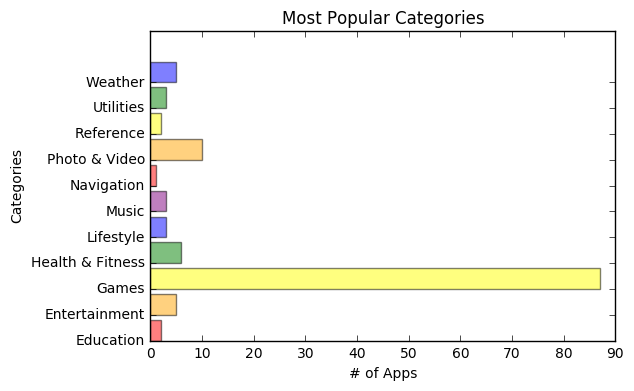

In [94]:
# Each category that is represented in the top charts

eduData = noDupsData[noDupsData['Category'].str.contains('Education')]
entertainData = noDupsData[noDupsData['Category'].str.contains('Entertainment')]
gamesData = noDupsData[noDupsData['Category'].str.contains('Games')]
healthData = noDupsData[noDupsData['Category'].str.contains('Health & Fitness')]
lifeData = noDupsData[noDupsData['Category'].str.contains('Lifestyle')]
musicData = noDupsData[noDupsData['Category'].str.contains('Music')]
navData = noDupsData[noDupsData['Category'].str.contains('Navigation')]
photoData = noDupsData[noDupsData['Category'].str.contains('Photo & Video')]
refData = noDupsData[noDupsData['Category'].str.contains('Reference')]
utilData = noDupsData[noDupsData['Category'].str.contains('Utilities')]
weatherData = noDupsData[noDupsData['Category'].str.contains('Weather')]

# The count of the number of apps in each category

eduCount = len(eduData)
entertainCount = len(entertainData)
gamesCount = len(gamesData)
healthCount = len(healthData)
lifeCount = len(lifeData)
musicCount = len(musicData)
navCount = len(navData)
photoCount = len(photoData)
refCount = len(refData)
utilCount = len(utilData)
weatherCount = len(weatherData)
socialNetCount = len(socialData)

objects = ('Education','Entertainment','Games',
      'Health & Fitness','Lifestyle','Music','Navigation','Photo & Video',
      'Reference','Utilities','Weather')
y_pos = np.arange(len(objects))
performance = [eduCount,entertainCount,
               gamesCount,healthCount,lifeCount,musicCount,navCount,photoCount,refCount,
               utilCount,weatherCount]
colors = ('red','orange','yellow','green','blue','purple','red','orange','yellow','green','blue') 
plt.barh(y_pos, performance,alpha=0.5,color=colors)
# plt.xticks(y_pos, objects)
plt.yticks(y_pos,objects)
plt.ylabel('Categories')
plt.xlabel('# of Apps')
plt.title('Most Popular Categories')
 
plt.show()
# len(y_pos)

In [95]:
# View all different Prices
set(data['Price'])


{'0', '10', '15', '2', '3', '4', '5', '6', '7', '8', '99'}

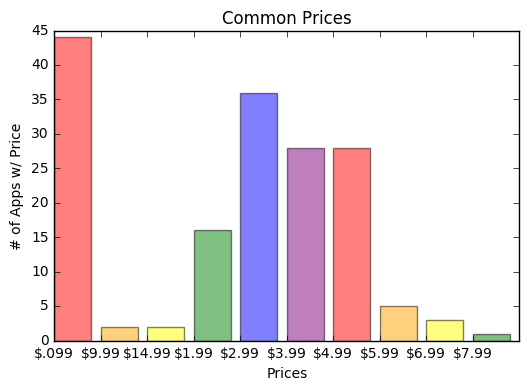

In [114]:
# Creating a dataset to look at prices
priceData = data[['Name','Category','Price']]
priceData = priceData.drop_duplicates()
p99 = priceData[priceData['Price'].str.contains('99')]
p999 = priceData[priceData['Price'].str.contains('10')]
p1499 = priceData[priceData['Price'].str.contains('15')]
p199 = priceData[priceData['Price'].str.contains('2')]
p299 = priceData[priceData['Price'].str.contains('3')]
p399 = priceData[priceData['Price'].str.contains('4')]
p499 = priceData[priceData['Price'].str.contains('5')]
p599 = priceData[priceData['Price'].str.contains('6')]
p699 = priceData[priceData['Price'].str.contains('7')]
p799 = priceData[priceData['Price'].str.contains('8')]
# p0 = priceData[priceData['Price'].str.contains('0')]


p99Count = len(p99)
p999Count = len(p999)
p1499Count = len(p1499)
p199Count = len(p199)
p299Count = len(p299)
p399Count = len(p399)
p499Count = len(p499)
p599Count = len(p599)
p699Count = len(p699)
p799Count = len(p799)
# p0Count = len(p0)

objects = ('$.099','$9.99','$14.99',
      '$1.99','$2.99','$3.99','$4.99','$5.99',
      '$6.99','$7.99')

y_pos = np.arange(len(objects))
performance = [p99Count,p999Count,
               p1499Count,p199Count,p299Count,p399Count,p499Count,p599Count,p699Count,
               p799Count]
colors = ('red','orange','yellow','green','blue','purple','red','orange','yellow','green') 
plt.bar(y_pos, performance,alpha=0.5,color=colors)
# plt.xticks(y_pos, objects)
plt.xticks(y_pos,objects)
plt.ylabel('# of Apps w/ Price')
plt.xlabel('Prices')
plt.title('Common Prices')
 
plt.show()
# len(y_pos)
# priceData

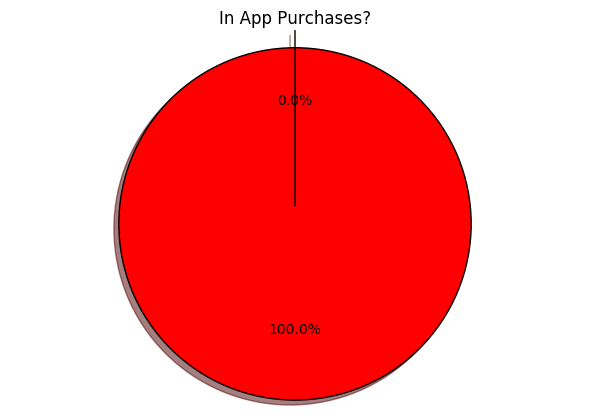

In [97]:
# Creating a data frame to look at in app purchases 
purchaseData = data[['Name','Category','In App Purchases','Age Restriction']]
purchaseData = purchaseData.drop_duplicates()

# All apps have in app Purchases except for those that say 'Information 
# Not Available'

plt.pie(
    [purchaseData['In App Purchases'][purchaseData['In App Purchases'] == 'Yes'].count(),\
     purchaseData['In App Purchases'][purchaseData['In App Purchases'] == 'No'].count()],
    
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1,0),
      startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )


plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title("In App Purchases?")
plt.show()


In [3]:
# Looking at the sellers of the apps
sellData1 = data1[['Name','Category','Seller','Rank']]
sellData2 = data2[['Name','Category','Seller','Rank']]
sellData3 = data3[['Name','Category','Seller','Rank']]
sellData4 = data4[['Name','Category','Seller','Rank']]
sellData5 = data5[['Name','Category','Seller','Rank']] #data5's seller data is inaccurate
sellData6 = data6[['Name','Category','Seller','Rank']]
sellData7 = data7[['Name','Category','Seller','Rank']]

# Drop all duplicates of the same Name only, in order to keep the Rank
sellData1 = sellData1.drop_duplicates(subset='Name')
sellData2 = sellData2.drop_duplicates(subset='Name')
sellData3 = sellData3.drop_duplicates(subset='Name')
# sellData4 = sellData4.drop_duplicates(subset='Name')
sellData5 = sellData5.drop_duplicates(subset='Name')
sellData6 = sellData6.drop_duplicates(subset='Name')
sellData7 = sellData7.drop_duplicates(subset='Name')


# Creating a data set to look at seller data, excluding 'data4
sellerData = pd.concat([sellData1, sellData2,sellData3,sellData5,sellData6,sellData7])
sellerData = sellerData.drop_duplicates(subset='Name')

# Mostly Different 
len(set(sellerData.Seller))
len(sellerData.Seller)

# Trying to find the most popular company
# someData = sellerData[sellerData['Seller'].str.contains('Ubisoft')]
# someCount = len(someData)
# someCount

# There are 96 Sellers for the entire week
len(set(sellerData.Seller))

96

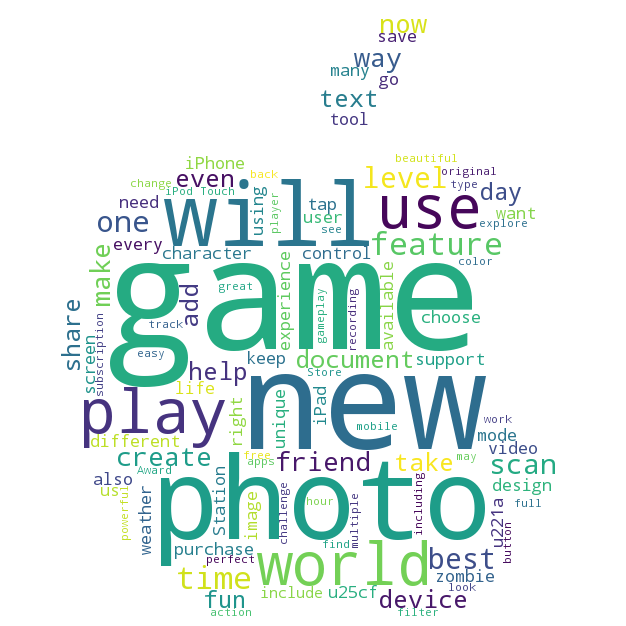

In [4]:
### Adding all descriptions (in the middle of the week) to a JSON to create a word cloud
data4['Description'].to_json('paidDesc.json')
# The word cloud is generated using another python script (appleCloud.py) in the 'Word Cloud'
# folder in the root directory 
# Display a word cloud of descriptions in the middle of the week
Image(filename='applePaidCloud.png')